# Gradient Descent with SGD Regressor

## Gradient Descent

Question: What is a loss function? (Explain it in terms of the relationship between true and predicted values) 


Question: What loss functions do we know?

To solidify our knowledge of gradient descent, we will use Sklearn's stochastic gradient descent algorithm for regression [SGDRegressor](https://scikit-learn.org/stable/modules/sgd.html#regression).   Sklearn classifiers share many methods and parameters, such as fit/predict, but some have useful additions.  SGDRegressor has a new method called partial_fit, which will allow us to inspect the calculated coefficients after each step of gradient descent.  

We will use the boston dataset for this task.  

In [59]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd

data = load_boston()
X = pd.DataFrame(data['data'], columns=data.feature_names)
y = data['target']

In [60]:
X.shape

(506, 13)

In [61]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# Sklearn Linear Regression

Let's train a linear regression model with our usual tools.  This is a demo, so don't worry about train-test split or scaling.

In [62]:
#__SOLUTION__
# Import and fit a linear regression model

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)


LinearRegression()

In [63]:
#__SOLUTION__
# print out the coefficients next to the column names using zip
for column, coef in zip(X.columns, lr.coef_):
    print(column, coef)

CRIM -0.10801135783679539
ZN 0.04642045836687953
INDUS 0.020558626367068917
CHAS 2.6867338193448442
NOX -17.766611228299986
RM 3.8098652068092282
AGE 0.0006922246403431768
DIS -1.47556684560025
RAD 0.30604947898516427
TAX -0.012334593916574021
PTRATIO -0.9527472317072921
B 0.00931168327379375
LSTAT -0.5247583778554881


#__SOLUTION__
Question: Linear regression minimizes a loss funciton.  What is that loss function? Describe that loss function.
Mean squared error.  This is average sum of squared difference between true and predicted values.

In [64]:
#__SOLUTION__
# import mean squared error from sklearn and calculate the mse for the linear regression fit
from sklearn.metrics import mean_squared_error
mean_squared_error(y, lr.predict(X))


21.894831181729202

This will be our point of comparison for an algorithm that finds optimal coefficients point by point.

# Stocastic Gradient Descent

To reinforce the concepts of gradient descent, we will use a new sklearn regression algorithm: SGD Regressor.

Stochastic gradient descent is an extreme version of gradient descent, where the gradient is calculated point by point.  The sklearn object has a new method called partial fit which returns the model coefficients after each parameter update.

In [65]:
#__SOLUTION__
# import SGDRegressor from linear_model, and feed X,y into the partial_fit method
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd.partial_fit(X,y)

SGDRegressor()

In [66]:
def print_coef_with_names(coefs, X_cols=X.columns):
    for column, coef in zip(X_cols, coefs):
        print(column, coef)

In [67]:
#__SOLUTION__
# print out the coefficients
print_coef_with_names(sgd.coef_)

CRIM 9248453431.19943
ZN -157367798392.41797
INDUS 63860889065.46721
CHAS 12365818429.838337
NOX 3108798768.2026725
RM -126614072974.6004
AGE -703254024048.0352
DIS -95755308788.34927
RAD 203660484964.64618
TAX 1014860770693.7168
PTRATIO -57235913650.13802
B 530384291922.47473
LSTAT 557913445708.476


In [68]:
#__SOLUTION__
# Calculate the MSE after the partial fit
mean_squared_error(y, sgd.predict(X))

3.3780267683406674e+29

In [69]:
#__SOLUTION__
#repeat the partial fit, print coefs, and mean squared error
sgd.partial_fit(X,y)
print_coef_with_names(sgd.coef_)
mean_squared_error(y, sgd.predict(X))

CRIM -22024619507.24189
ZN -111143120208.08276
INDUS -24244046502.734722
CHAS 10510492057.118137
NOX -2838433732.986221
RM -131269942876.76709
AGE -514587524378.1428
DIS -24048365367.79538
RAD -255209035691.49573
TAX -1081571105108.1255
PTRATIO -61038556753.82538
B 117865289104.21437
LSTAT 762617055730.6617


2.232891384112193e+29

#__SOLUTION__
Describe what has happened to the CRIM coefficient. Make sure to reference the loss function. 
Updating the CRIM coeffient by making it more negative made the model more accurate.  We can see this when looking at the loss function, which went down.

In [75]:
#__SOLUTION__
# Write a for loop and run partial_fit 1000 times.  
# Store the loss and the value of the CRIME coefficient after each loop

sgd = SGDRegressor()
loss = []
crim_coef = []

for _ in range(10000):
    sgd.partial_fit(X, y)
    loss.append(mean_squared_error(y, sgd.predict(X)))
    crim_coef.append(sgd.coef_[0])


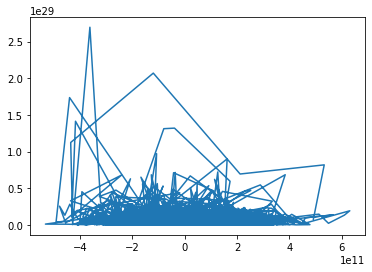

In [79]:
#__SOLUTION__
# plot the coef_ vs loss
import matplotlib.pyplot as plt 
fig, ax = plt.subplots()
ax.plot(crim_coef, loss)

In [ ]:
#__SOLUTION__
# Compare the coefficients and mean squared error to those of linear regression.
sgd.coef_


In [73]:
mean_squared_error(y, sgd.predict(X))

2.0484476786581073e+28

# Scaling

The effects of scaling are drastic in this case.  Try performing the code above, but with scaled data.  Compare the mse of linear regression to that of stocastic gradient descent.

In [83]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_sc = ss.fit_transform(X)

sgd_sc = SGDRegressor()
sgd_sc.fit(X_sc, y)
mean_squared_error(y, sgd_sc.predict(X_sc))

22.035460200463024

In [84]:
sgd_sc.coef_

array([-0.82598957,  0.93729946, -0.11465939,  0.73201581, -1.86018918,
        2.7420822 , -0.00778865, -3.05488737,  1.93700234, -1.22918969,
       -1.99045338,  0.85640588, -3.68985731])

In [85]:
lr.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

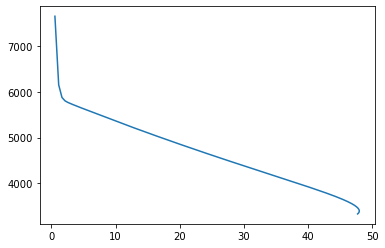

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(coef_0, loss)

In [15]:
# code
sgd.fit(X,y)

/Users/johnmaxbarry/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDRegressor(penalty=None)

In [16]:
sgd.coef_

array([  47.96827157,  -41.98141051,  279.55838156,  193.37895453,
         32.81047805,    4.14153642, -156.90665958,  138.29408461,
        245.69014148,  133.82231668])

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)
lr.coef_

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

In [34]:
mean_squared_error(y, lr.predict(X))

2859.6903987680657

In [29]:
# code
coef_0 = []
loss = []

sgd = SGDRegressor(penalty=None)
for _ in range(10000):
    sgd.partial_fit(X,y)
    coef_0.append(sgd.coef_[0])
    loss.append(mean_squared_error(y, sgd.predict(X)))

In [31]:
sgd.coef_

array([ 2.46223394e-01, -2.16779253e+02,  5.06832760e+02,  3.11482222e+02,
       -4.98778687e+01, -1.14792937e+02, -2.08271838e+02,  1.24160285e+02,
        4.28093550e+02,  1.04708053e+02])

In [32]:
mean_squared_error(y, sgd.predict(X))

2887.678604670771

# Try the same with scaled data.

In [35]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_sc = ss.fit_transform(X)

In [55]:
import pandas as pd
pd.DataFrame(X_sc).describe()

,0,1,2,3,4,5,6,7,8,9
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000,4.420000e+02
mean,-3.215126e-17,-6.430251e-17,-4.420798e-17,8.037814e-18,2.411344e-17,-2.009453e-17,2.411344e-17,-2.411344e-17,0.000000,-3.215126e-17
std,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133,1.001133e+00
min,-2.254290e+00,-9.385367e-01,-1.897929e+00,-2.363066e+00,-2.665411e+00,-2.430626e+00,-2.150883e+00,-1.606102e+00,-2.651046,-2.896390e+00
25%,-7.841722e-01,-9.385367e-01,-7.196249e-01,-7.706577e-01,-7.200196e-01,-6.382488e-01,-7.382960e-01,-8.303008e-01,-0.699016,-6.975491e-01
50%,1.131724e-01,-9.385367e-01,-1.531324e-01,-1.192178e-01,-9.084100e-02,-8.029125e-02,-1.384305e-01,-5.449919e-02,-0.040947,-2.265729e-02
75%,8.005001e-01,1.065488e+00,6.569519e-01,7.493688e-01,5.961931e-01,6.274425e-01,6.162390e-01,7.213025e-01,0.681870,5.869224e-01
max,2.327895e+00,1.065488e+00,3.585718e+00,2.776071e+00,3.235851e+00,4.179278e+00,3.809072e+00,3.894331e+00,2.808758,2.851075e+00


In [36]:
# code
coef_0 = []
loss = []

sgd_sc = SGDRegressor(penalty=None)
for _ in range(10000):
    sgd_sc.partial_fit(X_sc,y)
    coef_0.append(sgd_sc.coef_[0])
    loss.append(mean_squared_error(y, sgd_sc.predict(X_sc)))

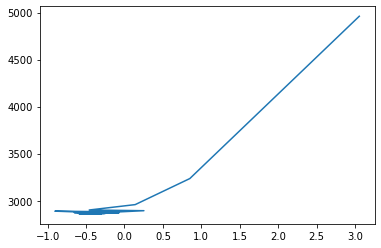

In [37]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(coef_0, loss)

In [38]:
sgd_sc.coef_

array([ -0.47657511, -11.40320942,  24.71988401,  15.41499735,
       -37.69763747,  22.66430961,   4.79129232,   8.39846079,
        35.7123744 ,   3.2122573 ])

With scaled data, the SGD regressor is able to achieve essentially the same results as linear regression.

In [40]:
mean_squared_error(y, sgd_sc.predict(X_sc))

2859.69513059776

# Standard Scale

In [41]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_sc, y)
lr.coef_

array([ -0.47623169, -11.40703082,  24.72625713,  15.42967916,
       -37.68035801,  22.67648701,   4.80620008,   8.422084  ,
        35.73471316,   3.21661161])

In [42]:
mean_squared_error(y, lr.predict(X_sc))

2859.6903987680657